In [5]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .appName("CreditRiskEDA") \
    .config("spark.driver.memory", "4g") \
    .config("spark.executor.memory", "4g") \
    .getOrCreate()

25/06/07 13:59:14 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [6]:
application_df= spark.read.parquet("../data/processed/application_train.parquet")

In [7]:
application_df.printSchema()

root
 |-- SK_ID_CURR: integer (nullable = true)
 |-- TARGET: integer (nullable = true)
 |-- NAME_CONTRACT_TYPE: string (nullable = true)
 |-- CODE_GENDER: string (nullable = true)
 |-- FLAG_OWN_CAR: string (nullable = true)
 |-- FLAG_OWN_REALTY: string (nullable = true)
 |-- CNT_CHILDREN: integer (nullable = true)
 |-- AMT_INCOME_TOTAL: double (nullable = true)
 |-- AMT_CREDIT: double (nullable = true)
 |-- AMT_ANNUITY: double (nullable = true)
 |-- AMT_GOODS_PRICE: double (nullable = true)
 |-- NAME_TYPE_SUITE: string (nullable = true)
 |-- NAME_INCOME_TYPE: string (nullable = true)
 |-- NAME_EDUCATION_TYPE: string (nullable = true)
 |-- NAME_FAMILY_STATUS: string (nullable = true)
 |-- NAME_HOUSING_TYPE: string (nullable = true)
 |-- REGION_POPULATION_RELATIVE: double (nullable = true)
 |-- DAYS_BIRTH: integer (nullable = true)
 |-- DAYS_EMPLOYED: integer (nullable = true)
 |-- DAYS_REGISTRATION: double (nullable = true)
 |-- DAYS_ID_PUBLISH: integer (nullable = true)
 |-- OWN_CAR_AG

In [8]:
application_df.limit(5).toPandas()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
num_rows = application_df.count()
num_cols = len(application_df.columns)
print(f"Total Rows: {num_rows}, Total Columns: {num_cols}")

Total Rows: 307511, Total Columns: 122


In [14]:
application_df.describe().toPandas()

25/06/07 14:03:43 WARN DAGScheduler: Broadcasting large task binary with size 1478.2 KiB
                                                                                

,summary,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,count,307511,307511,307511,307511,307511,307511,307511,307511,307511,...,307511,307511,307511,307511,265992,265992,265992,265992,265992,265992
1,mean,278180.51857657125,0.08072881945686496,None,None,None,None,0.4170517477423572,168797.91929698453,599025.9997057016,...,0.008129790479039774,5.951006630657115E-4,5.072989258920819E-4,3.349473677364387E-4,0.006402448193930645,0.0070002105326475985,0.0343619356973142,0.26739526000781977,0.26547414959848414,1.899974435321363
2,stddev,102790.17534842345,0.27241864564839546,None,None,None,None,0.722121384437626,237123.14627885324,402490.77699585445,...,0.08979823610939612,0.02438746506586239,0.022517620268446063,0.018298531822437545,0.08384912844747658,0.11075740632435446,0.2046848758128244,0.9160023961526179,0.7940556483207547,1.869294998181561
3,min,100002,0,Cash loans,F,N,N,0,25650.0,45000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,max,456255,1,Revolving loans,XNA,Y,Y,19,1.17E8,4050000.0,...,1,1,1,1,4.0,9.0,8.0,27.0,261.0,25.0


From the `application_train` dataset, we observe several important characteristics. The `TARGET` column has a mean of approximately 0.0807, which indicates that only about 8% of the applicants in the dataset defaulted on their loans. This confirms that we are dealing with a **heavily imbalanced classification problem**, which should be addressed during modeling through appropriate metrics (like AUC or F1) and possibly class balancing techniques.

Looking at the financial variables, there are clear signs of **outliers and skewed distributions**. For example, the `AMT_INCOME_TOTAL` column has a mean of around 168,798 but a maximum value exceeding 117 million — a highly unrealistic number that likely indicates data entry issues or extreme outliers. Similarly, `AMT_CREDIT` has values ranging up to 4 million, suggesting that log transformations or outlier treatment might be necessary for reliable modeling.

The `CNT_CHILDREN` column shows a maximum of 19 children, while the average is just 0.42, indicating that a few extreme values are skewing the distribution. These should be capped or flagged as potential outliers. Additionally, categorical fields like `CODE_GENDER` include a value of "XNA", which is not a valid gender category. This likely represents missing or corrupted data and should either be excluded or treated as a separate category.

Features such as `FLAG_DOCUMENT_18` to `FLAG_DOCUMENT_21` have near-zero means and extremely low standard deviations, suggesting that these flags are almost always zero and may not contribute meaningfully to predictive modeling. These columns could be candidates for removal during feature selection.

Lastly, the credit bureau inquiry features like `AMT_REQ_CREDIT_BUREAU_YEAR` and `AMT_REQ_CREDIT_BUREAU_QRT` show some unusual patterns. While most values are small, there are maximum values like 25 and even 261 inquiries, which are likely **anomalies**. These columns also have around 13.5% missing data. A sensible approach would be to fill missing values with zeros (if the absence implies no inquiries) and cap the upper range at a reasonable percentile to reduce the influence of outliers.

In [17]:
# Get list of (column name, data type) tuples
dtype_list = [(f.name, f.dataType.simpleString()) for f in application_df.schema.fields]

# Convert to Spark DataFrame
dtype_df = spark.createDataFrame(dtype_list, ["column_name", "data_type"])

# Group by data type and count
dtype_df.groupBy("data_type").count().orderBy("count", ascending=False).show(truncate=False)

[Stage 17:>                                                         (0 + 2) / 2]

+---------+-----+
|data_type|count|
+---------+-----+
|double   |65   |
|int      |41   |
|string   |16   |
+---------+-----+



In [18]:
from pyspark.sql.types import StringType

# Get all categorical (string) columns
cat_cols = [f.name for f in application_df.schema.fields if isinstance(f.dataType, StringType)]

# Create a list of (column_name, number_of_unique_values)
unique_counts = [(col, application_df.select(col).distinct().count()) for col in cat_cols]

# Convert the list to a Spark DataFrame for neat display
unique_counts_df = spark.createDataFrame(unique_counts, ["column_name", "unique_value_count"])

# Show results
unique_counts_df.orderBy("unique_value_count", ascending=False).show(truncate=False)


+--------------------------+------------------+
|column_name               |unique_value_count|
+--------------------------+------------------+
|ORGANIZATION_TYPE         |58                |
|OCCUPATION_TYPE           |19                |
|NAME_TYPE_SUITE           |8                 |
|WALLSMATERIAL_MODE        |8                 |
|NAME_INCOME_TYPE          |8                 |
|WEEKDAY_APPR_PROCESS_START|7                 |
|NAME_FAMILY_STATUS        |6                 |
|NAME_HOUSING_TYPE         |6                 |
|NAME_EDUCATION_TYPE       |5                 |
|FONDKAPREMONT_MODE        |5                 |
|HOUSETYPE_MODE            |4                 |
|CODE_GENDER               |3                 |
|EMERGENCYSTATE_MODE       |3                 |
|NAME_CONTRACT_TYPE        |2                 |
|FLAG_OWN_CAR              |2                 |
|FLAG_OWN_REALTY           |2                 |
+--------------------------+------------------+



In [23]:
from pyspark.sql.functions import col, isnan, when
from pyspark.sql.types import NumericType

def missing_values_table_spark(df):
    total_rows = df.count()
    missing_data = []

    for field in df.schema.fields:
        col_name = field.name
        if isinstance(field.dataType, NumericType):
            missing_count = df.filter(col(col_name).isNull() | isnan(col(col_name))).count()
        else:
            missing_count = df.filter(col(col_name).isNull()).count()

        if missing_count > 0:
            missing_percent = (missing_count / total_rows) * 100
            missing_data.append((col_name, missing_count, round(missing_percent, 1)))

    if missing_data:
        result_df = spark.createDataFrame(missing_data, ["column_name", "missing_count", "percent_missing"])
        result_df = result_df.orderBy("percent_missing", ascending=False)
        print(f"\nYour DataFrame has {len(df.columns)} columns.")
        print(f"There are {len(missing_data)} columns with missing values.\n")
        return result_df
    else:
        print("No missing values found.")
        return None

In [25]:
missing_summary_df = missing_values_table_spark(application_df)

if missing_summary_df:
    missing_summary_df.show(n=67, truncate=False)


Your DataFrame has 122 columns.
There are 67 columns with missing values.

+----------------------------+-------------+---------------+
|column_name                 |missing_count|percent_missing|
+----------------------------+-------------+---------------+
|COMMONAREA_MEDI             |214865       |69.9           |
|COMMONAREA_AVG              |214865       |69.9           |
|COMMONAREA_MODE             |214865       |69.9           |
|NONLIVINGAPARTMENTS_MODE    |213514       |69.4           |
|NONLIVINGAPARTMENTS_AVG     |213514       |69.4           |
|NONLIVINGAPARTMENTS_MEDI    |213514       |69.4           |
|LIVINGAPARTMENTS_AVG        |210199       |68.4           |
|LIVINGAPARTMENTS_MODE       |210199       |68.4           |
|LIVINGAPARTMENTS_MEDI       |210199       |68.4           |
|FONDKAPREMONT_MODE          |210295       |68.4           |
|FLOORSMIN_AVG               |208642       |67.8           |
|FLOORSMIN_MEDI              |208642       |67.8           |
|FLOORSMI

The dataset has 67 columns with missing values. Many housing-related features (e.g., `COMMONAREA_AVG`, `NONLIVINGAPARTMENTS_MODE`) have over 60% missing data and may be dropped. Important features like `EXT_SOURCE_1` and `OCCUPATION_TYPE` have moderate missingness (20–50%) and can be imputed. Low-missing columns (e.g., `AMT_GOODS_PRICE`, `NAME_TYPE_SUITE`) can be filled easily. Features like `AMT_REQ_CREDIT_BUREAU_` (\~13.5% missing) can be filled with zeros.

## Check for Unbalanced Data

**TARGET 0 = loan has been repayed,**   

**Target 1 = loan is not repayed.**

In [32]:
# Total number of records
total_count = application_df.count()

# Count and percentage of each class in TARGET
target_distribution = (
    application_df.groupBy("TARGET")
    .count()
    .withColumn("percentage", (col("count") / total_count) * 100)
    .orderBy("TARGET")
)

target_distribution.show()

+------+------+-----------------+
|TARGET| count|       percentage|
+------+------+-----------------+
|     0|282686|91.92711805431351|
|     1| 24825|8.072881945686495|
+------+------+-----------------+



- 91.93% of applicants did not default.
- 8.07% of applicants defaulted.

**This shows a heavily imbalanced dataset, which will require special handling during modeling.**

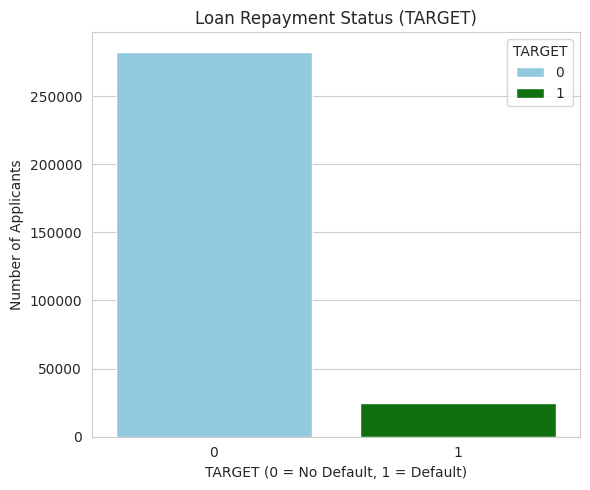

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to pandas for plotting
target_pd = target_distribution.toPandas()
color=['skyblue', 'green']

# Plot
plt.figure(figsize=(6, 5))
sns.barplot(x="TARGET", y="count", hue="TARGET", data=target_pd, palette=color)
plt.title("Loan Repayment Status (TARGET)")
plt.xlabel("TARGET (0 = No Default, 1 = Default)")
plt.ylabel("Number of Applicants")
plt.tight_layout()
plt.show()

## Loan Types

In [45]:
# Count of each loan type
loan_type_counts = (
    application_df.groupBy("NAME_CONTRACT_TYPE")
    .count()
    .orderBy("count", ascending=False)
)

loan_type_pd = loan_type_counts.toPandas()
loan_type_pd

,NAME_CONTRACT_TYPE,count
0,Cash loans,278232
1,Revolving loans,29279


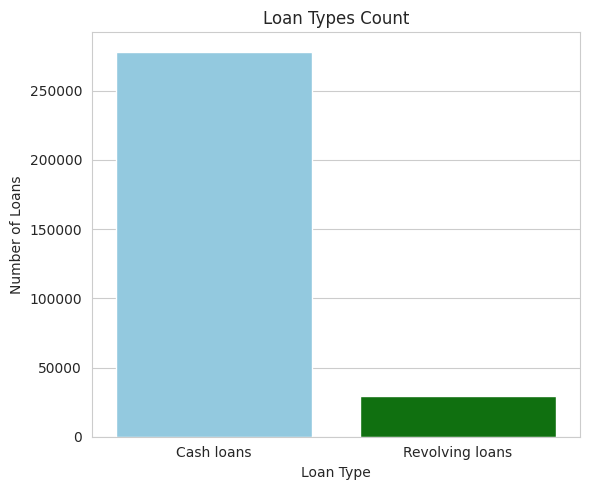

In [49]:
plt.figure(figsize=(6, 5))
sns.barplot(data=loan_type_pd, x="NAME_CONTRACT_TYPE", y="count", hue= 'NAME_CONTRACT_TYPE', palette=color)
plt.title("Loan Types Count")
plt.ylabel("Number of Loans")
plt.xlabel("Loan Type")
plt.tight_layout()
plt.show()

## Percent of defaults (TARGET = 1) by loan type

In [50]:
default_rate_by_type = (
    application_df.groupBy("NAME_CONTRACT_TYPE")
    .agg(
        count("*").alias("total"),
        count(when(col("TARGET") == 1, True)).alias("defaults")
    )
    .withColumn("default_rate_percent", (col("defaults") / col("total")) * 100)
    .orderBy("default_rate_percent", ascending=False)
)

default_rate_pd = default_rate_by_type.toPandas()
default_rate_pd

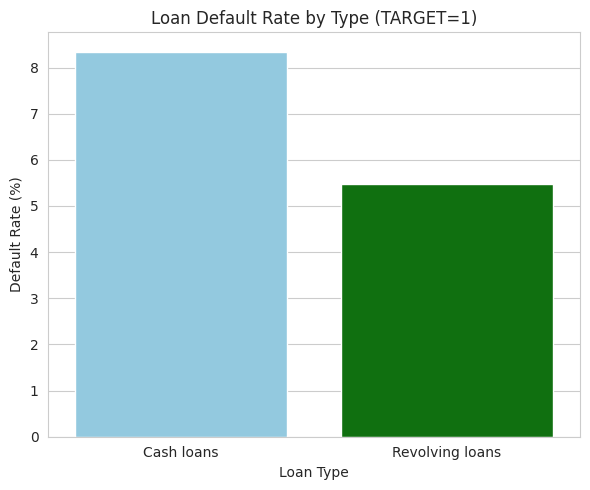

In [51]:
# Plot
plt.figure(figsize=(6, 5))
sns.barplot(data=default_rate_pd, x="NAME_CONTRACT_TYPE", y="default_rate_percent", hue='NAME_CONTRACT_TYPE' ,palette=color)
plt.title("Loan Default Rate by Type (TARGET=1)")
plt.ylabel("Default Rate (%)")
plt.xlabel("Loan Type")
plt.tight_layout()
plt.show()

The first plot shows that most of the applicants in the dataset have taken **cash loans**, while **revolving loans** are significantly less common. In the second plot, we observe that the **default rate is higher for cash loans** (around 8.3%) compared to revolving loans (about 5.5%). This indicates that although cash loans dominate in volume, they also carry a **greater risk of default**, making them a more critical focus for risk assessment and credit scoring.